# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/fabio/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


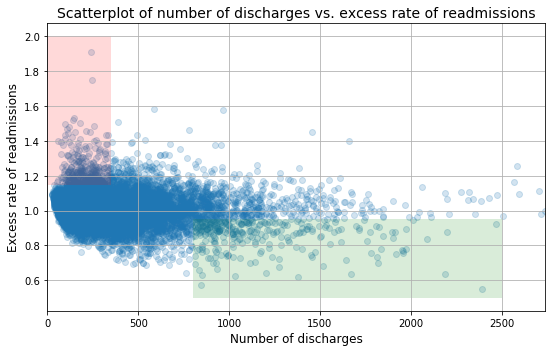

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Two main critiques:

1) Use exact readmission rate instead of predicted readmission rate.

2) For every hospital the goal is to test whether the excess readmission ratio is larger than 1 or not. This basically means that we aim to test whether an hospital is readmitting more patients than the expected value. When the number of discharges is low, there might not be enough data to conclude that. 

### First critique - Exact vs predicted readmission rate.

We begin with the first observation. We aim to understand the relation between the predicted readmission ratio and the exact readmission ratio.

/home/fabio/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


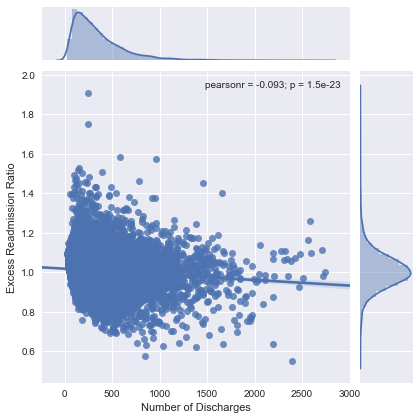

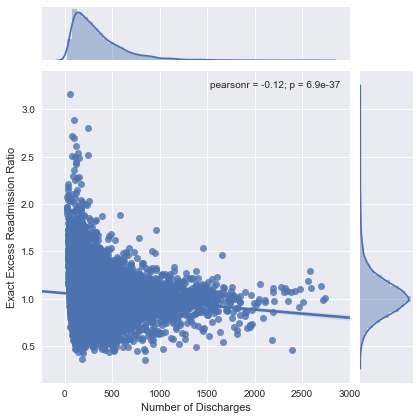

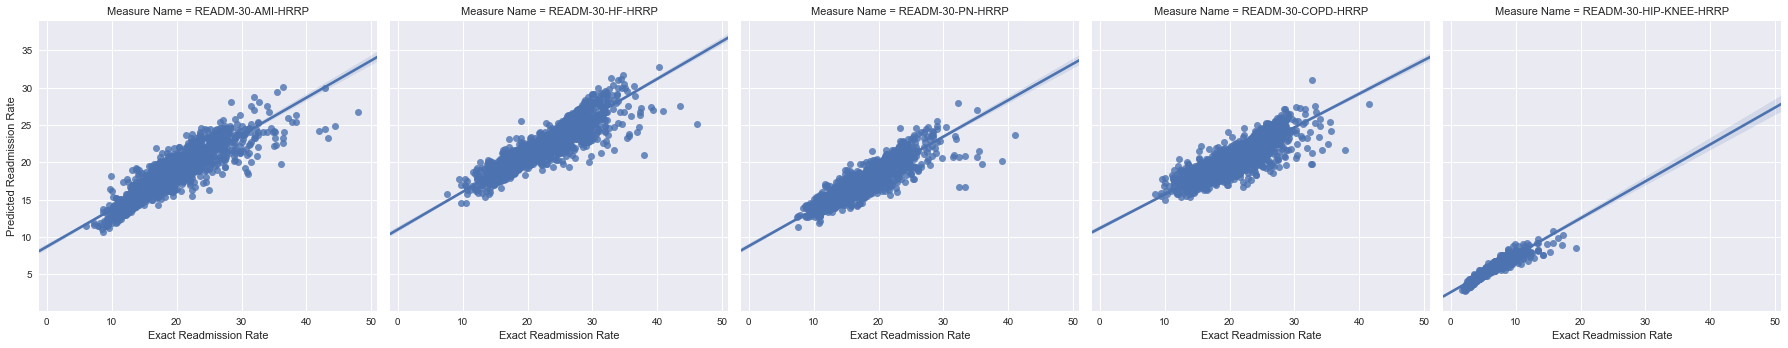

In [5]:
import seaborn as sns

# Keep only the hospitals with at least 25 discharges.
reduced_clean_hospital_read_df = clean_hospital_read_df.iloc[81:-3,:]
reduced_clean_hospital_read_df = reduced_clean_hospital_read_df.reset_index()


# Compute the exact readmission rate and the exact readmission ratio (using the exact and the expected readmission rates)
reduced_clean_hospital_read_df['Exact Readmission Rate'] = 100/(reduced_clean_hospital_read_df['Number of Discharges']/reduced_clean_hospital_read_df['Number of Readmissions'])
reduced_clean_hospital_read_df['Exact Excess Readmission Ratio'] = reduced_clean_hospital_read_df['Exact Readmission Rate']/reduced_clean_hospital_read_df['Expected Readmission Rate']

sns.jointplot(x= 'Number of Discharges', y= 'Excess Readmission Ratio', data = reduced_clean_hospital_read_df, kind = 'reg')
plt.show()

sns.jointplot(x= 'Number of Discharges', y= 'Exact Excess Readmission Ratio', data = reduced_clean_hospital_read_df, kind = 'reg')
plt.show()

sns.lmplot(x= 'Exact Readmission Rate', y= 'Predicted Readmission Rate', 
              data = reduced_clean_hospital_read_df, col = 'Measure Name')
plt.show()

Note that the predicted readmission rate is consistently positively correlated with the exact readmission rate. 

However, the predicted value is not always a good approximation for the exact value (the regression line is not y = x) and thus, when practically possible, the exact value should be used.  

Moreover, observe that different measures lead to quite different bias in the predicted readmission rate. 

### Second critique: The excess rate of readmission policy is not a good metric to determine whether an hospital has to be fined.   

We now consider the second, and more important, critique. 

Given an hospital with $N$ discharges, and an expected readmission rate of $r_{Exp}$, we aim to understand what is the number of readmissions that would lead to conclude that the test with hypothesis $H_0: r_{Exa} \leq r_{Exp}$ can be rejected, where $r_{Exa}$ is the exact readmission rate. The test should have a statistical significance of $\alpha = .01$

The following discussion assumes that the patients discharged are independent one from the other (not true if the same patient was discharged multiple times within the considered time frame).

### A. The excess rate of readmission does not take into account the fluctuations. Not necessarily a high excess of readmission rate implies an excessive readmission rate. In particular when the number of discharges is low.

In [6]:
from scipy.stats import binom

reduced_clean_hospital_read_df['Excess readmission p-value'] = [binom.sf(k=reduced_clean_hospital_read_df.iloc[ind,10] - 1,    # number of readmissions - 1
                                                               n=reduced_clean_hospital_read_df.iloc[ind,5],        # number of discharges
                                                               p=reduced_clean_hospital_read_df.iloc[ind,9]/100,    # probability of readmission (expected rate/100)
                                                               loc=0) 
                                                       for ind in range(reduced_clean_hospital_read_df.shape[0])] 


reduced_clean_hospital_read_df['Hospital to fine'] = reduced_clean_hospital_read_df['Excess readmission p-value'] < 0.01

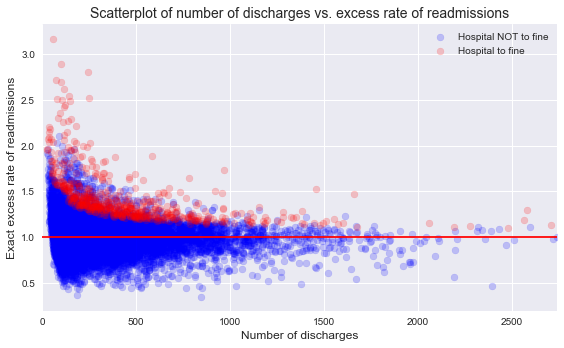

In [7]:
x_ok = [a for a in reduced_clean_hospital_read_df[reduced_clean_hospital_read_df['Hospital to fine']==False]['Number of Discharges']]
y_ok = list(reduced_clean_hospital_read_df[reduced_clean_hospital_read_df['Hospital to fine']==False]['Exact Excess Readmission Ratio'])

x_fine = [a for a in reduced_clean_hospital_read_df[reduced_clean_hospital_read_df['Hospital to fine']==True]['Number of Discharges']]
y_fine = list(reduced_clean_hospital_read_df[reduced_clean_hospital_read_df['Hospital to fine']==True]['Exact Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x_ok, y_ok, alpha=0.2, c = 'b', label = 'Hospital NOT to fine')
ax.scatter(x_fine, y_fine, alpha=0.2, c = 'r', label = 'Hospital to fine')

ax.hlines(1, 0, max(x), colors = 'r')

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Exact excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
ax.legend()

ax.grid(True)
fig.tight_layout()

Note that we cannot reject the hypothesis $H_0$ whenever the excess rate is above $1$. A statistically significant policy should take into account the fluctuations, we reject the hypothesis of exact readmission rate lower than expected readmission rate only if the p-value obtained is below .01. 

Furthermore, the Exact excess rate of readmissions does not appear as a consistent discriminant factor in determining whether an hospital has to be fined or not.


### B. The excess rate of readmission does not consistently separate the hospital to fine from those not to fine. This is because the number of discharges (size of the hospital) is not taken into account.

As an alternative way to judge whether an hospital is deserving a fine or not, we suggest to consider the following metric:

$$ D = \frac{\text{Exact readmission rate} - \text{Expected readmission rate}}{\sqrt{\text{Expected readmission rate}}}$$

Below, we plot the values of $D$ versus the number of discharges, note that the hospital to fine (red) are separated from those not to fine (blue) by a kind-of hyperbolic function. Being above or below such a function could be used as a practical rule to determine which hospitals are certainly deserving to be fined

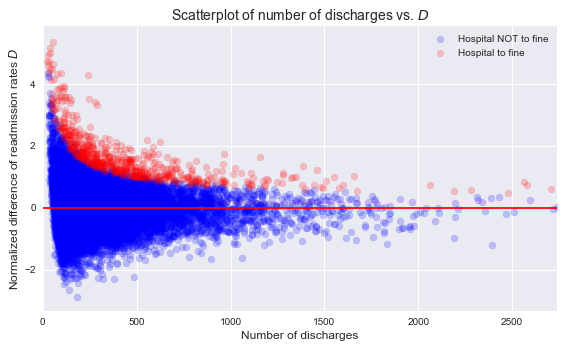

In [8]:
reduced_clean_hospital_read_df['Normalized Diff Rate'] = (reduced_clean_hospital_read_df['Exact Readmission Rate'] - reduced_clean_hospital_read_df['Expected Readmission Rate']) / np.sqrt(reduced_clean_hospital_read_df['Expected Readmission Rate'])

x_ok = [a for a in reduced_clean_hospital_read_df[reduced_clean_hospital_read_df['Hospital to fine']==False]['Number of Discharges']]
y_ok = list(reduced_clean_hospital_read_df[reduced_clean_hospital_read_df['Hospital to fine']==False]['Normalized Diff Rate'])

x_fine = [a for a in reduced_clean_hospital_read_df[reduced_clean_hospital_read_df['Hospital to fine']==True]['Number of Discharges']]
y_fine = list(reduced_clean_hospital_read_df[reduced_clean_hospital_read_df['Hospital to fine']==True]['Normalized Diff Rate'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x_ok, y_ok, alpha=0.2, c = 'b', label = 'Hospital NOT to fine')
ax.scatter(x_fine, y_fine, alpha=0.2, c = 'r', label = 'Hospital to fine')

ax.hlines(0, 0, max(x), colors = 'r')

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Normalized difference of readmission rates $D$', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. $D$', fontsize=14)
ax.legend()

ax.grid(True)
fig.tight_layout()